In [1]:
from matplotlib import pyplot as plt
from pyopenms import *
import matplotlib.patches as mpatches
exp = MSExperiment()
#Load mzML file and store it in MSExperiment
MzMLFile().load("E:\level 4\margo\MZml/HepG2-Trypsin-GluC-Zik-HILIC-R3.mzML",exp)
protein_ids = []
peptide_ids = []
SimpleSearchEngineAlgorithm().search("E:\level 4\margo\MZml/HepG2-Trypsin-GluC-Zik-HILIC-R3.mzML","E:\level 4\margo\Fasta/Pr395_GFP_IP_GFP_fs_mutant.fasta", protein_ids, peptide_ids)

for peptide_id in peptide_ids:
# Peptide identification values
    print(35*"=")
    print("Peptide ID m/z:", peptide_id.getMZ())
    print("Peptide ID rt:", peptide_id.getRT())
    print("Peptide scan index:", peptide_id.getMetaValue("scan_index"))
    print("Peptide ID score type:", peptide_id.getScoreType())

# PeptideHits
for Peptide in peptide_id.getHits():
    print(" - Peptide hit sequence:", Peptide.getSequence())
    mz = Peptide.getSequence().getMonoWeight(Residue.ResidueType.Full, Peptide.getCharge()) / Peptide.getCharge()
    print(" - Peptide hit monoisotopic m/z:", mz)
    score=mz/peptide_id.getMZ()
    print("comparsion score = ", score)
    a = str(Peptide.getSequence())
    tsg = TheoreticalSpectrumGenerator()
    spec1 = MSSpectrum()
    peptide = AASequence.fromString(a)
    p = Param()
    p.setValue("add_b_ion", "true")
    p.setValue("add_metainfo", "true")
    tsg.setParameters(p)
    tsg.getSpectrum(spec1, peptide, 1, 2)
    print("Spectrum 1 of", peptide, "has", spec1.size(), "peaks.")
    tsg1 = TheoreticalSpectrumGenerator()
    theo_spectrum = MSSpectrum()
    p = tsg1.getParameters()
    experiment_spectrum = exp.getSpectrum(peptide_id.getMetaValue("scan_index"))
    p.setValue("add_y_ions", "true")
    p.setValue("add_b_ions", "true")
    p.setValue("add_metainfo", "true")
    tsg1.setParameters(p)
    peptide = AASequence.fromString(a)
    tsg1.getSpectrum(theo_spectrum, peptide, 1, 2)


Peptide ID m/z: 1001.734680175781
Peptide ID rt: 706.0362013909801
Peptide scan index: 2517
Peptide ID score type: hyperscore
Peptide ID m/z: 996.414245605469
Peptide ID rt: 781.880851407
Peptide scan index: 2794
Peptide ID score type: hyperscore
Peptide ID m/z: 1007.076293945313
Peptide ID rt: 1018.4037574859999
Peptide scan index: 3709
Peptide ID score type: hyperscore
Peptide ID m/z: 1437.087768554688
Peptide ID rt: 1675.54872211098
Peptide scan index: 6044
Peptide ID score type: hyperscore
Peptide ID m/z: 996.748779296875
Peptide ID rt: 1763.52046561398
Peptide scan index: 6377
Peptide ID score type: hyperscore
Peptide ID m/z: 1445.08984375
Peptide ID rt: 1771.89878438298
Peptide scan index: 6409
Peptide ID score type: hyperscore
Peptide ID m/z: 969.403747558594
Peptide ID rt: 1777.0251267840001
Peptide scan index: 6429
Peptide ID score type: hyperscore
Peptide ID m/z: 814.895568847656
Peptide ID rt: 2180.71379644698
Peptide scan index: 7867
Peptide ID score type: hyperscore
 - Pep

Number of matched peaks: 15
ions      theoretical. m/z      experimental m/z
--------------------------------------------------
y2++	2	169.59477933362103	169.95814514160156
y1+	1	175.118952913371	175.11898803710938
b3++	2	204.573710301721	204.0865936279297
y3++	2	213.11079391337103	213.15992736816406
b4++	2	233.08444234957102	233.0837860107422
b2+	1	293.113199977171	293.1064453125
y5++	2	330.16101563667104	330.1186828613281
b7++	2	367.67141371642106	368.1459045410156
b8++	2	436.20086982807106	436.14593505859375
b10++	2	529.2510915513711	529.1962890625
y5+	1	659.314754806571	659.2427368164062
b9+	1	970.4628774764711	970.4299926757812
y8+	1	1008.5261456678711	1008.4454956054688
b10+	1	1057.4949066359711	1057.4759521484375
y10+	1	1164.616024050671	1164.5321044921875
YEDGGVLHVSFSYR


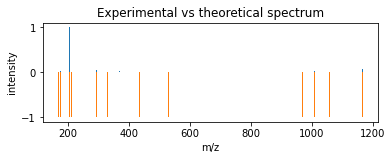

In [2]:
import numpy as np
from matplotlib import pyplot as plt

def mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title):
    obs_int = [element / max(obs_int) for element in obs_int] # relative intenstiy
    theo_int = [element * -1 for element in theo_int] # invert the intensity for the mirror plot
    #plt.figure(figsize=(12,8))
    plt.bar(obs_mz, obs_int, width = 3.0)
    plt.bar(theo_mz, theo_int, width = 3.0)
    plt.title(title)
    plt.ylabel('intensity')
    plt.xlabel('m/z')

obs_mz, obs_int = experiment_spectrum.get_peaks()

# We filter the peaks of the theoretical spectrum to fit the range (to reduce image complexity)
theo_mz, theo_int = [], []
for mz, intensity in zip(*theo_spectrum.get_peaks()):
    if mz >= 200.0 and mz <= 800.0:
        theo_mz.append(mz)
        theo_int.append(intensity)



alignment = []
spa = SpectrumAlignment()
p = spa.getParameters()
    # use 0.5 Da tolerance (Note: for high-resolution data we could also use ppm by setting the is_relative_tolerance value to true)
p.setValue("tolerance", 0.5)
p.setValue("is_relative_tolerance", "false")
spa.setParameters(p)
    # align both spectra
spa.getSpectrumAlignment(alignment, theo_spectrum, experiment_spectrum)
print("Number of matched peaks: " + str(len(alignment)))
print("ions"+"      "+"theoretical. m/z"+"      "+"experimental m/z")
print(50*"-")


for theo_idx, obs_idx in alignment:
    ion_name = theo_spectrum.getStringDataArrays()[0][theo_idx].decode()
    ion_charge = theo_spectrum.getIntegerDataArrays()[0][theo_idx]
    print(ion_name + "\t" + str(ion_charge) + "\t"
          + str(theo_spectrum[theo_idx].getMZ())
          + "\t" + str(experiment_spectrum[obs_idx].getMZ()))
b=str(peptide_id.getMetaValue("scan_index"))
print(a)

theo_mz, theo_int, obs_mz, obs_int = [], [], [], []
for theo_idx, obs_idx in alignment:
    theo_mz.append(theo_spectrum[theo_idx].getMZ())
    theo_int.append(theo_spectrum[theo_idx].getIntensity())
    obs_mz.append(experiment_spectrum[obs_idx].getMZ())
    obs_int.append(experiment_spectrum[obs_idx].getIntensity())
plt.subplot(2, 1, 1)
    # make range form 300 to 1000 to see the simialrity
title = 'Experimental vs theoretical spectrum'
mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)  
   

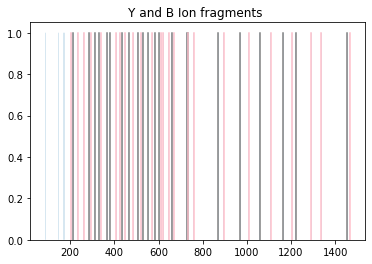

In [3]:
#y and b fragments
mz,i = spec1.get_peaks() 
plt.title("Y and B Ion fragments ")
count = 0
idx=0
annot = spec1.getStringDataArrays()[0]
bars = plt.bar(mz, i, snap=False)
for mz, i in zip(*theo_spectrum.get_peaks()):
    if mz >= 200 and mz <= 1500:
        if 'y' in theo_spectrum.getStringDataArrays()[0][count].decode():
          
            plt.plot([mz, mz], [0, i], snap=True, color="pink")

            count = count + 1
        else:
            plt.plot([mz, mz], [0, i], snap=True, color="gray")
                

            count = count + 1

plt.ylim(bottom=0)
plt.show()


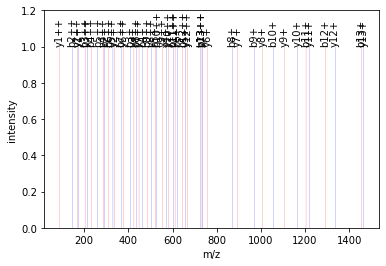

In [4]:
#can try another way
mz,i = spec1.get_peaks() 
annot = spec1.getStringDataArrays()[0] 
bars =plt.bar(spec1.get_peaks()[0], spec1.get_peaks()[1], snap=False,color =("r","b"),)
count=0
for rect in bars: 
    height = rect.get_height() 
    if "y" in annot[count].decode():
        plt.text(rect.get_x() + rect.get_width() / 2.0, height, annot[count].decode(), ha='center', va='bottom', rotation=90, snap=True)
    else :
         plt.text(rect.get_x() + rect.get_width() / 2.0, height, annot[count].decode(), ha='center', va='bottom', rotation=90,snap=True) 
    idx += 1 
    count+=1
    plt.ylim(top=1.2) 
    plt.xlabel("m/z") 
    plt.ylabel("intensity")

In [2]:
#Proteolytic Digestion with Trypsin
from pyopenms import *
import matplotlib.pyplot as plt
import numpy as np
dig = ProteaseDigestion()
dig.getEnzymeName()
entries=[]
f=FASTAFile()
f.load("E:\level 4\margo\Fasta/Pr395_GFP_IP_GFP_fs_mutant.fasta",entries)
c=0
while c<len(entries)-1:
    f=AASequence.fromString(entries[c].sequence)
    print("sequence: ",c)
    result = []
    dig.digest(f, result)
    for e in result:
        print(e.toString())
    print(len(result)) 
    c=c+1
lis=[]
peptides=[AASequence.fromString(s.toString()) for s in result]
for peptide in peptides:
    tsg=TheoreticalSpectrumGenerator()
    spec1=MSSpectrum()
    p=Param()
    p.setValue("add_b_ions","true")
    p.setValue("add_y_ions","true")
    p.setValue("add_metainfo","true")
    tsg.setParameters(p)
    tsg.getSpectrum(spec1,peptide,1,1)
    lis.append(spec1)
    print("Spectrum 1 of",peptide,"has",lis[0].size(),"peaks")
  
  

sequence:  0
MGKPIPNPLLGLDSTGGGKPIPNPLLGLDSTGGTEMSFLSSEVLVGDLMSPFDPSGLGAEESLGLLDDYLEVAK
HFKPHGFSSDK
AK
AGSSEWLAVGGYGER
R
ERPAR
HGDR
VPHHR
HPER
R
GVR
AGGR
R
R
GHPR
AGPHDQQDEEHQR
RPDLQPLPAEPR
DGLR
LLPLR
HLPQR
LR
EPLPAR
HQQR
R
LHQHPHR
EVR
GR
R
R
AAR
ELQLPLR
GRPR
DR
R
LQGDGHR
LPR
GQR
DLHR
QDHPQQR
HR
GAPAPHGR
41
sequence:  1
MGKPIPNPLLGLDSTGGGKPIPNPLLGLDSTGGTEMSFLSSEVLVGDLMSPFDPSGLGAEESLGLLDDYLEVAK
HFKPHGFSSDK
AK
AGSSEMAR
CR
R
IWR
ATR
AACPPWR
SSAASPAP
10
sequence:  2
MGKPIPNPLLGLDSTGGGKPIPNPLLGLDSTGGTEMSFLSSEVLVGDLMSPFDPSGLGAEESLGLLDDYLEVAK
HFKPHGFSSDK
AK
AGSSENGSLSEDMESDESGLPAMEIECR
ITGTLNGVEFELVGGGEGTPEQGR
MTNK
MK
STK
GALTFSPYLLSHVMGYGFYHFGTYPSGYENPFLHAINNGGYTNTR
IEK
YEDGGVLHVSFSYR
YEAGR
VIGDFK
VMGTGFPEDSVIFTDK
IIR
SNATVEHLHPMGDNDLDGSFTR
TFSLR
DGGYYSSVVDSHMHFK
SAIHPSILQNGGPMFAFR
R
VEEDHSNTELGIVEYQHAFK
TPDADAGEE
22
sequence:  3
MGKPIPNPLLGLDSTGGGKPIPNPLLGLDSTGGTEMSFLSSEVLVGDLMSPFDPSGLGAEESLGLLDDYLEVAK
HFKPHGFSSDK
AK
AGSSEGSLSEDMESDESGLPAMEIECR
ITGTLNGVEFELVGGGEGTPEQGR
MTNK
MK
STK
GALTFSPYL

In [1]:
from matplotlib import pyplot as plt
from pyopenms import *
import matplotlib.patches as mpatches
exp = MSExperiment()
#Load mzML file and store it in MSExperiment
MzMLFile().load("E:\level 4\margo\MZml/HepG2-Trypsin-GluC-Zik-HILIC-R3.mzML",exp)
protein_ids = []
peptide_ids = []
SimpleSearchEngineAlgorithm().search("E:\level 4\margo\MZml/HepG2-Trypsin-GluC-Zik-HILIC-R3.mzML","E:\level 4\margo\Fasta/Pr395_GFP_IP_GFP_fs_mutant.fasta", protein_ids, peptide_ids)

for peptide_id in peptide_ids:
# Peptide identification values
    print(35*"=")
    print("Peptide ID m/z:", peptide_id.getMZ())
    print("Peptide ID rt:", peptide_id.getRT())
    print("Peptide scan index:", peptide_id.getMetaValue("scan_index"))
    print("Peptide ID score type:", peptide_id.getScoreType())
  #Show all Data in peptides
    for hit in peptide_id.getHits():
        print(" - Peptide hit sequence:", hit.getSequence())
        mz = hit.getSequence().getMonoWeight(Residue.ResidueType.Full, hit.getCharge()) / hit.getCharge()
        print(" - Peptide hit monoisotopic m/z:", mz)
        score=mz/peptide_id.getMZ()
        print("comparsion score = ", score)
        a = str(hit.getSequence())
        tsg = TheoreticalSpectrumGenerator()
        spec1 = MSSpectrum()
        peptide = AASequence.fromString(a)
        p = Param()
        p.setValue("add_b_ion", "true")
        p.setValue("add_metainfo", "true")
        tsg.setParameters(p)
        tsg.getSpectrum(spec1, peptide, 1, 2)
        tsg1 = TheoreticalSpectrumGenerator()
        theo_spectrum = MSSpectrum()
        p = tsg1.getParameters()
        p.setValue("add_y_ions", "true")
        p.setValue("add_b_ions", "true")
        p.setValue("add_metainfo", "true")
        experiment_spectrum = exp.getSpectrum(peptide_id.getMetaValue("scan_index"))
        tsg1.setParameters(p)
        peptide = AASequence.fromString(a)
        tsg1.getSpectrum(theo_spectrum, peptide, 1, 2)
        print("Spectrum 1 of", peptide, "has", spec1.size(), "peaks.")
        alignment = []
        spa = SpectrumAlignment()
        p = spa.getParameters()
    # use 0.5 Da tolerance (Note: for high-resolution data we could also use ppm by setting the is_relative_tolerance value to true)
        p.setValue("tolerance", 0.5)
        p.setValue("is_relative_tolerance", "false")
        spa.setParameters(p)
    # align both spectra
        spa.getSpectrumAlignment(alignment, theo_spectrum, experiment_spectrum)
        print("Number of matched peaks: " + str(len(alignment)))
        print("ions"+"      "+"theoretical. m/z"+"      "+"experimental m/z")
        print(50*"-")
        for theo_idx, obs_idx in alignment:
            ion_name = theo_spectrum.getStringDataArrays()[0][theo_idx].decode()
            ion_charge = theo_spectrum.getIntegerDataArrays()[0][theo_idx]
            print(ion_name + "\t" + str(ion_charge) + "\t"
                  + str(theo_spectrum[theo_idx].getMZ())
                  + "\t" + str(experiment_spectrum[obs_idx].getMZ()))


Peptide ID m/z: 1001.734680175781
Peptide ID rt: 706.0362013909801
Peptide scan index: 2517
Peptide ID score type: hyperscore
 - Peptide hit sequence: AGSSENGSLSEDMESDESGLPAM(Oxidation)EIEC(Carbamidomethyl)R
 - Peptide hit monoisotopic m/z: 1001.7427248518712
comparsion score =  1.0000080307453154
Spectrum 1 of AGSSENGSLSEDMESDESGLPAM(Oxidation)EIEC(Carbamidomethyl)R has 106 peaks.
Number of matched peaks: 6
ions      theoretical. m/z      experimental m/z
--------------------------------------------------
y2++	2	168.07843918267102	168.0822296142578
y1+	1	175.118952913371	175.1193084716797
b6++	2	273.611355961221	274.0654602050781
y4++	2	289.14176846977097	289.09503173828125
b8+	1	690.268928710871	690.2457275390625
y10+	1	1191.549661542571	1191.459228515625
Peptide ID m/z: 996.414245605469
Peptide ID rt: 781.880851407
Peptide scan index: 2794
Peptide ID score type: hyperscore
 - Peptide hit sequence: AGSSENGSLSEDMESDESGLPAMEIEC(Carbamidomethyl)R
 - Peptide hit monoisotopic m/z: 996.411